# <font color='orange'>Credit Card Fraud</font>
![](https://www.axisbank.com/images/default-source/progress-with-us_new/card-frauds.jpg)

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
# visualizing the dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# verifying the info about dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the estatistical information

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### We can see that the std of 'Amount' column is very high, we can then visualize the outliers of that column

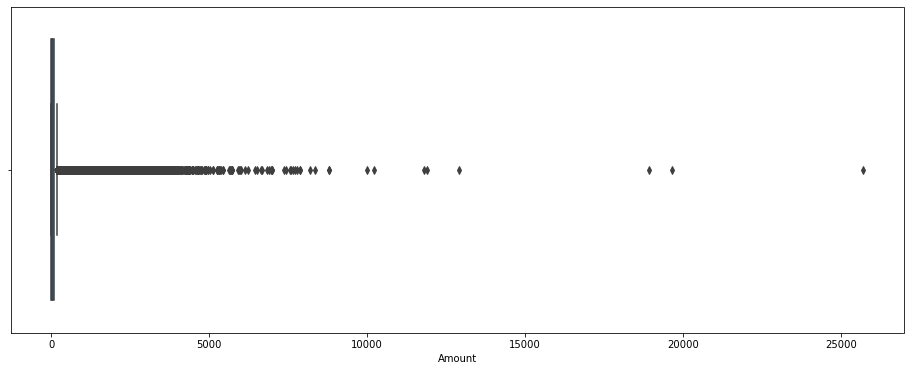

In [6]:
# ploting the boxplot

fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(x=df['Amount'], ax=ax)

plt.show()

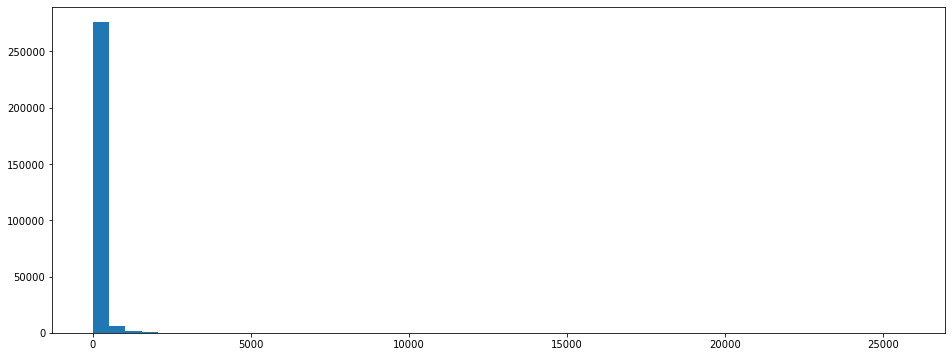

In [7]:
# ploting the histogram

fig, ax = plt.subplots(figsize=(16, 6))

ax.hist(df.Amount, bins=50)

plt.show()

- excluding outliers may not be a good option, so we'll leave them as they are

### Standardizing the data from 'Time' and 'Amount' columns

In [8]:
std = preprocessing.StandardScaler()

# Time column
df['Time'] = std.fit_transform(df.Time.values.reshape(-1, 1))

# Amount column
df['Amount'] = std.fit_transform(df.Amount.values.reshape(-1, 1))

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.050379e-14,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,3.202236e-16,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


### Observing the 'Class' column

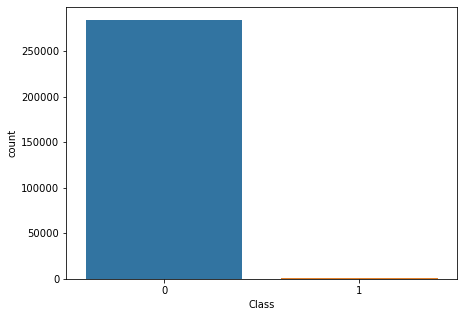

In [10]:
# plotting the countplot 

fig, ax = plt.subplots(figsize=(7, 5))

sns.countplot(x=df['Class'], ax=ax)

plt.show()

### Splitting the data into train and test

In [11]:
# splitting the target of df

X = df.drop('Class', axis=1)
y = df.Class

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.33)

In [13]:
y_train.value_counts()

0    190490
1       330
Name: Class, dtype: int64

In [14]:
# checking the percentual

y_train.value_counts() * 100 / len(y_train)

0    99.827062
1     0.172938
Name: Class, dtype: float64

### <font color='red'>More then 99.8% of data isn't fraud</font>

- Here we have an extremely **unbalanced dataset**
- If we train our model with this data, it will be an error, 'cause our model will be more concerned with the values of greater expression
- **So we have to balance the data**

In [15]:
# importing the RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

In [16]:
rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X_train, y_train)

In [17]:
# the new shape of y balanced

y_res.shape

(660,)

In [18]:
# value counts of y balanced

y_res.value_counts()

0    330
1    330
Name: Class, dtype: int64

### Now we can train our models with this balanced data

DecisionTreeClassifier
[[84484  9341]
 [   15   147]]
Recall0.9074074074074074
AUC: 0.46153012929239556

LogisticRegression
[[90098  3727]
 [   15   147]]
Recall0.9074074074074074
AUC: 0.7198830212256101

SVC
[[92410  1415]
 [   24   138]]
Recall0.8518518518518519
AUC: 0.6159085688291698

RandomForestClassifier
[[91269  2556]
 [   18   144]]
Recall0.8888888888888888
AUC: 0.7308469378292002

KNeighborsClassifier
[[91893  1932]
 [   21   141]]
Recall0.8703703703703703
AUC: 0.536772351102683



[]

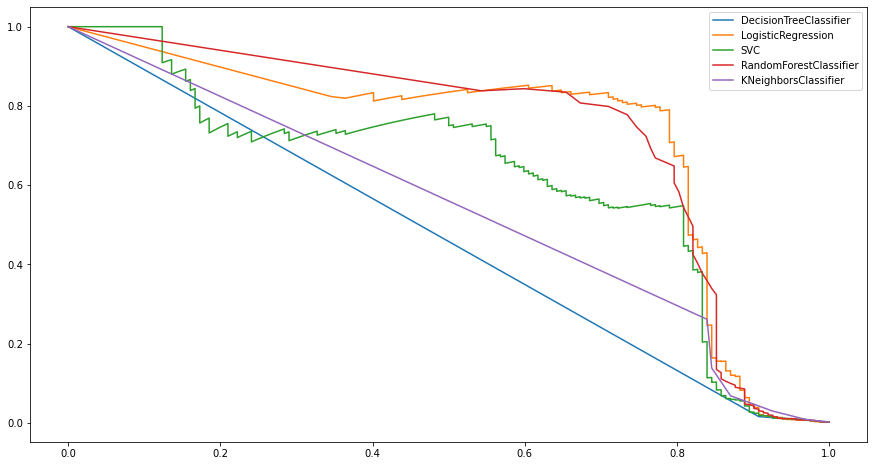

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))

for model in [DecisionTreeClassifier, LogisticRegression, SVC, RandomForestClassifier, KNeighborsClassifier]:
    
    print(model.__name__, end='\n')
    if model.__name__ == 'SVC':
        clf = model(probability=True, random_state=42)
    elif model.__name__ == 'KNeighborsClassifier':
        clf = model()
    else:
        clf = model(random_state=42)
        
    # training our model    
    
    clf.fit(X_res, y_res)
    
    # assigning to the variable y_proba the probability of the class being positive (fraud)
    
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    
    y_pred = clf.predict(X_test)
    
    # instantiating the precision_recall_curve and plotting
    
    precision, recall, _  = metrics.precision_recall_curve(y_test, y_proba)
    
    ax.plot(recall, precision, label=model.__name__)
    
    # printing the metrics of evaluation
    
    print(metrics.confusion_matrix(y_test, y_pred), end='\n')
    print(f'Recall{metrics.recall_score(y_test, y_pred)}')
    print(f'AUC: {metrics.auc(recall, precision)}', end='\n\n')
    
ax.legend()
ax.plot()

- The best models were ``RandomForest`` and ``LogisticRegression``
- We can use the GridSearchCV to try to improve these models

# Random Forest

In [20]:
# selecting the params

params_rf = {
    'n_estimators': [70, 75, 80, 85],
    'max_depth': [None, 1],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6]
}

In [21]:
clf_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, scoring='recall')

In [22]:
# training the model

clf_rf.fit(X_res, y_res)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [70, 75, 80, 85]},
             scoring='recall')

In [23]:
# checking the best params to this data

clf_rf.best_estimator_

RandomForestClassifier(n_estimators=75, random_state=42)

In [24]:
# evaluation the RandomForest

y_pred_rf = clf_rf.predict(X_test)
y_proba_rf = clf_rf.predict_proba(X_test)[:, 1]

precision_rf, recall_rf, theresholds_rf = metrics.precision_recall_curve(y_test, y_proba_rf)

print(metrics.confusion_matrix(y_test, y_pred_rf), end='\n')
print(f'Recall: {metrics.recall_score(y_test, y_pred_rf)}')
print(f'AUC: {metrics.auc(recall_rf, precision_rf)}', end='\n\n')

[[91092  2733]
 [   18   144]]
Recall: 0.8888888888888888
AUC: 0.7238141185158464



# Logistic Regression

In [25]:
# selecting the params

params_lr = {
    'C': [0.1, 1.0, 10, 20],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

In [26]:
clf_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=5000), params_lr, scoring='recall')

In [27]:
clf_lr.fit(X_res, y_res)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, random_state=42),
             param_grid={'C': [0.1, 1.0, 10, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='recall')

In [28]:
# checking the beest params to this data

clf_lr.best_estimator_

LogisticRegression(max_iter=5000, random_state=42)

In [29]:
# evaluation the LogisticRegression

y_pred_lr = clf_lr.predict(X_test)
y_proba_lr = clf_lr.predict_proba(X_test)[:, 1]

precision_lr, recall_lr, theresholds_lr = metrics.precision_recall_curve(y_test, y_proba_lr)

print(metrics.confusion_matrix(y_test, y_pred_lr), end='\n')
print(f'Recall: {metrics.recall_score(y_test, y_pred_lr)}')
print(f'AUC: {metrics.auc(recall_lr, precision_lr)}', end='\n\n')

[[90098  3727]
 [   15   147]]
Recall: 0.9074074074074074
AUC: 0.7198830212256101



- Both models acted very similar
- Logistic Regression scored more than **90%** on fraud hits and Random Forest has a higher hit rate for non-fraudulent transactions